## Project Proposal
### By: Benjamin Giese & Brady Cassada

#### Identify your dataset

Within our project there will be two datasets, one containing National Hockey League (NHL) team statistics and a second set that has attendance data by team and year. The team data includes each team's overall performance for a single year (wins, goals, penalty minutes, etc.). We plan to combine a subset of each of thes two data sets in order to explore relationships between team performance and attendance.

Team Data: We will be using the 'Teams.csv' from this dataset specifically. [Dataset]('https://www.kaggle.com/open-source-sports/professional-hockey-database#Teams.csv') 

Attendance Data: ESPN has public data of a Team's Home/Away/Overall attendance from 2000-Present day. This isn't already formatted as we will have to collect it all and clean it to our needs for analyzing. [One year of data]('http://www.espn.com/nhl/attendance/_/year/2019')

We'll have to join these two datasets together in some way, this will be done via year and team name. Knowing the 'Teams.csv' data only goes up to 2011, and the ESPN data starts 2000 we will have completed data from the years 2000-2011. 

#### Objectives for analyzing your dataset

Our goal is to find a relationship between and, ideally, predict attendance based on one or more of the following factors:
* Wins
* Average goals per game
* Average penalty minutes
    
Some additional thoughts:
* The team stats data set includes data for teams that are in leagues other than the NHL. We will only be focusing on NHL teams.
* The first 10 rows of this table are all from 1909, look pretty lame, and are missing a lot of values. Data collection has obviously come a long way in the last 100 years so the more recent data that we will be looking at (2000-2011) is pretty much free of missing values, **this is why we used the tail function instead of head**.
* Due to a lockout, there was no 2004-2005 NHL season.

In [1]:
# First Ten Records of Datset

import pandas as pd
#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Teams.csv')

df = df.drop(df[df.year < 2000].index)
df = df.drop(df[df.lgID != "NHL"].index)
df = df.drop('lgID', 1)

df['year'] = df['year'].astype('category')
df['tmID'] = df['tmID'].astype('category')
df['confID'] = df['confID'].astype('category')
df['divID'] = df['divID'].astype('category')
df['playoff'] = df['playoff'].astype('category')
df['name'] = df['name'].astype('category')
df['rank'] = df['rank'].astype('category')

df = df.drop('franchID', 1)

attendance_df = pd.read_csv('attendance.csv')
# attendance_df.info()

def pull_city(full_name) :
    if ('New York' in full_name):
        name_split = full_name.split()
        return "NY " + name_split[2]
    elif ('New ' in full_name or 'St. ' in full_name or 'Los ' in full_name or 'San ' in full_name or 'Tampa ' in full_name):
        name_split = full_name.split()
        return name_split[0] + ' ' + name_split[1]
    elif (' of ' not in full_name) :
        return full_name.split()[0]
    else :
        name_split = full_name.split()
        return name_split[len(name_split) - 1]



df['name'] = df['name'].map(lambda name: pull_city(name))

In [2]:
attendance_df = attendance_df.drop('Home Percentage', 1)
attendance_df = attendance_df.drop('Road Percentage', 1)
attendance_df = attendance_df.drop('Percentage', 1)

# Replace Arizona with Phoenix and replace Winnipeg with Atlanta
for index, row in attendance_df.iterrows():
    if row['Team'] == 'Arizona':
        attendance_df.at[index, 'Team'] = 'Phoenix'
    elif row['Team'] == 'Winnipeg' and row['Year'] != 2011:
        attendance_df.at[index, 'Team'] = 'Atlanta'

       

attendance_df['Rank'] = attendance_df['Rank'].astype('category')
attendance_df['Team'] = attendance_df['Team'].astype('category')
attendance_df['Year'] = attendance_df['Year'].astype('category')
attendance_df = attendance_df.rename(columns={"Rank": 'Attendance Rank'}) 

combined_df = pd.merge(df, attendance_df,  how='right', left_on=['name','year'], right_on = ['Team','Year'])
combined_df = combined_df.drop('Year', 1)
combined_df = combined_df.drop('Games', 1)
combined_df = combined_df.drop('Team', 1)

combined_df = combined_df.rename(columns={"rank": "division rank"})

combined_df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 329
Data columns (total 32 columns):
year                       330 non-null category
tmID                       330 non-null category
confID                     330 non-null category
divID                      330 non-null category
division rank              330 non-null category
playoff                    176 non-null category
G                          330 non-null int64
W                          330 non-null int64
L                          330 non-null int64
T                          120 non-null float64
OTL                        330 non-null float64
Pts                        330 non-null int64
SoW                        210 non-null float64
SoL                        210 non-null float64
GF                         330 non-null int64
GA                         330 non-null int64
name                       330 non-null object
PIM                        330 non-null float64
BenchMinor                 330 non-nul

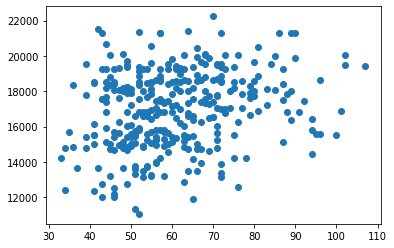

In [3]:
# plt.scatter(x=combined_df["W"], y=combined_df["Home Total Attendance"])
plt.scatter(x=combined_df["PPG"], y=combined_df["Home Average Attendance"])

#### Team Member: Brady Cassada/Ben Giese

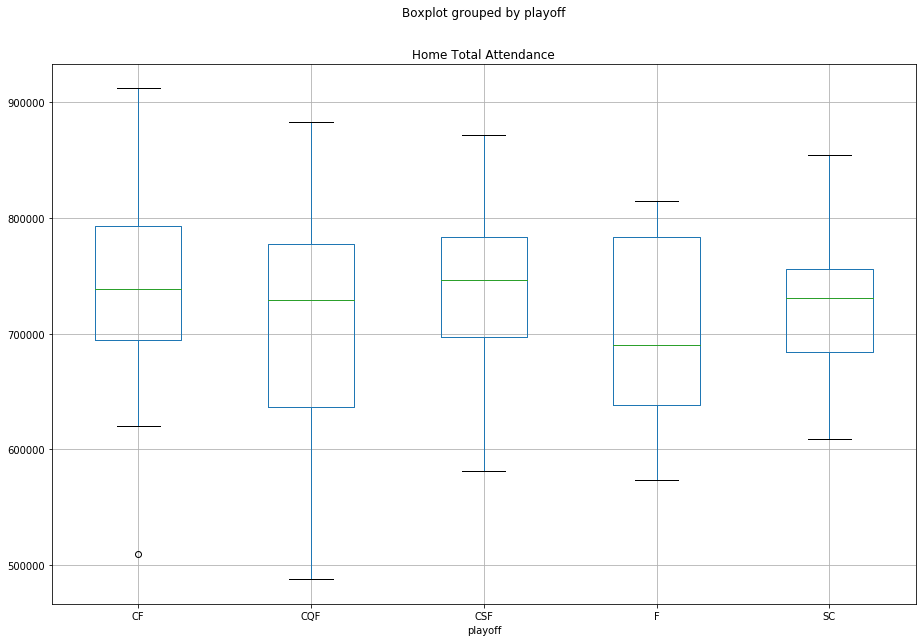

In [4]:
combined_df.boxplot(by="playoff", column="Home Total Attendance", figsize=(15,10))

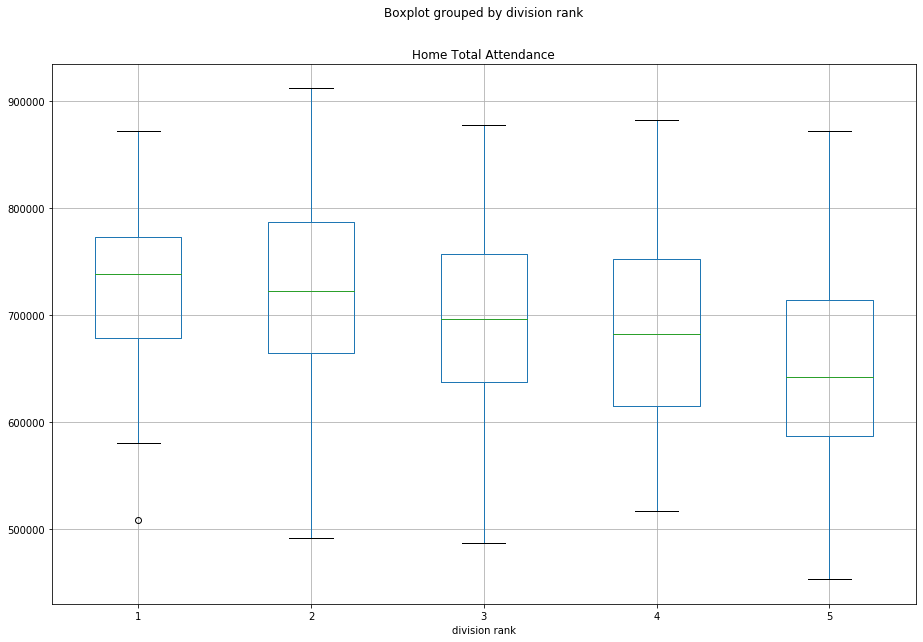

In [5]:
combined_df.boxplot(by="division rank", column="Home Total Attendance", figsize=(15,10))

# The Data Set
* year - Denotes which season the stats are from  
* lgID - Id of the league that the team belongs to
    * This column was dropped because we are only focusing on one league (NHL)
* tmID - Id that denotes which team the stats are for
* confID - Denotes the conference that the team plays in
    * The NHL is split into 2 conferences - Eastern Conference & Western Conference
* divID - Id of the division that the team plays in
* rank - The final standing of the team within their division
* playoff - The playoff round that the team made it to
    * CQF = Conference Quarter Final
    * CSF = Conference Semi-Final
    * CF = Conference Final
    * SC = Stanley Cup
* G - total games played
* W - total wins
    * Worth 2 points
* L - total losses
* T - total ties
    * Ties were only possible prior to the 2005 season, the NHL then switched to an overtime syste,
    * A tie is worth 1 point
* OTL - overtime losses
* Pts - total point
* SoW - total shootout wins
* SoL - total shootout losses
* GF - goals for
* GA - goals against
* name - name of the team (city)
* PIM - penalty minutes
* BenchMinor - penalty minutes as a result of bench minors
    * Bench minors include penalties such as:
        * Too many men on the ice
        * Unsportsmanlike conduct by the coach
        * Delay of game
* PPG - power play goals
* PPC - power play chances
* SHA - short handed goals against
* PKG - power play goals against
* PKC - penalty kill chances
* SHF - shorthanded goals for
* Attendance Rank - attendance ranking relative to all other teams in the league
* Home Games - total home games played
* Home Total Attendance - total attendance for all home games
* Home Average Attendance - average attendance for home games
* Road Games - total away games played
* Road Average - average attendance for away games
* Average - overall average attendance

# Data preprocessing
Luckily for us, the NHL data collection is pretty thorough and doesn't leave many missing values. However, there is one exception due to a rule change before the 2005 season. Previously, the NHL did not have any type of overtime and games could end in a tie. Starting in 2005, a 5 minute sudden-death overtime would be played in the event of a tie. If neither team scored in the 5 minutes, a shootout would then decide the game. This results in no values for overtime losses or shootout wins/losses prior to 2005. Additionally, only years prior to 2005 have values for ties.  
Fortunately, we identified all of these statistics to be unlikely to have any real impact on a teams attendance. Because of this, we will simply not incorporate these columns into our models.